# Chapter 10. 일반 선형 모델 및 최소제곱법

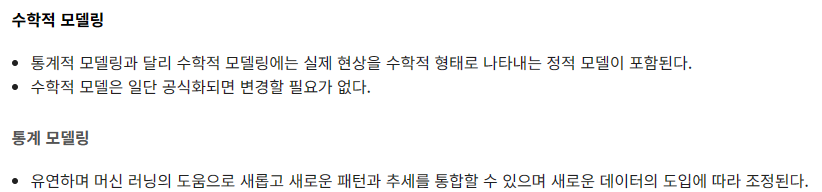

### 10.1 일반 선형 모델

통계 모델: 예측변수(독립변수)를 관측값(종속변수)과 연관시키는 방정식의 집합

#### 10.1.1 용어

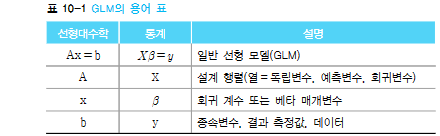

#### 10.1.2 일반 선형 모델 구축

예시. 개인의 체중과 부모의 키 기반 성인 키 예측 모델<br>
β가 가중치인 선형 가중 결합

---



image.png

ε: 오차항(잔차, residual), 체중과 부모의 키가 개인의 키를 완전히 결정할 수 없기 때문

β: 각 변수가 얼마나 중요한지 알 수 없음, 가중치

베타0: 절편, 상수

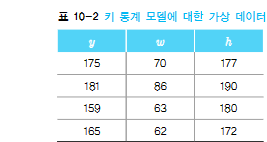

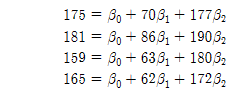

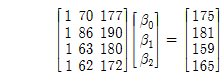

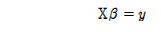

### 10.2 GLM 풀이

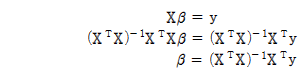

최소 제곱법

#### 10.2.1 해법이 정확할까요?

image.png

y가 X의 열공간에 있는 경우는 거의 없음

예시. 음주 행태로 GPA를 예측하는 설문조사(@ 2000명 학생)<br>
- 질문: 술 얼마나 마시는지, 얼마나 필름이 끊기는지, GPA는 얼마 → 2000x3<br>
설계 공간: 2000주변 차원 내부의 2차원 부분 공간<br>
데이터 벡터: 동일 주변 차원 1차원 부분 공간

데이터가 설계 행렬의 열공간에 잇으면 모델이 데이터가 가진 분산의 100%를 설명

하지만 노이즈, 샘플링 변동성 포함되어 있기때문에 모든 변동성을 설명하기 어려움

이에 ε을 추가하여 모델 예측 데이터와 관측 데이터 간의 불일치를 허용하도록 GLM 방정식 수정

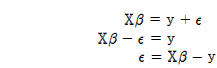

① ε을 설계 행렬의 열공간에 적합하도록 데이터 벡터에 추가하고<br>
② 잔차 항이 데이터에 완벽하게 적합하도록 설계 행렬 조정<br>
③ 잔차를 모델 예측 데이터와 관측 데이터의 차이로 정의

*관측된 데이터가 회귀변수가 생성하는 부분공간 내에 있는 경우가 거의 없음

#### 10.2.2 최소제곱법의 기하학적 관점

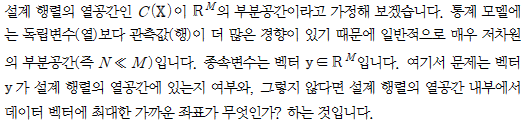

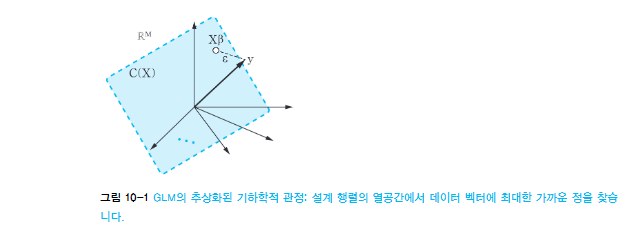

목적: 데이터 벡터 y와의 거리를 최소화하는 X의 열에 가중치를 부여하는 계수 β 집합을 찾는 것<br>
투영 벡터는 ε

image.png

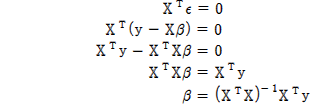

#### 10.2.3 최소제곱법은 어떻게 작동할까요?

'제곱'은 예측된 데이터와 관측된 데이터 간의 제곱 오차

image.png

image.png

모델이 데이터에 잘 적합하면 오차는 작아짐

모델 적합의 목적은 ε의 원소를 최소화하는 β원소를 선택하는 것

오차를 최소화하는 방식만 사용하면 모델이 음의 무한대를 향한 값을 예측

예측 오차 자체가 양수인지 음수인지에 관계없이 관찰된 데이터 y에 대한 기하학적 제곱거리에 해당하는 제곱 오차를 최소화<br>
오차의 제곱 노름을 최소화하는 것 → '최소제곱'

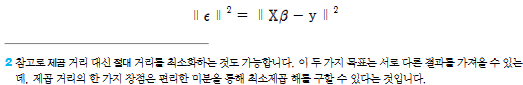

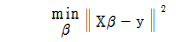

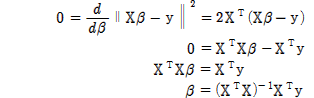

모델 예측값과 관측값 사이의 제곱거리 최소화라는 관점에서 시작하여<br>
다시 선형대수학의 직관으로 도달했던 최소제곱법 도출

직관적인 예시

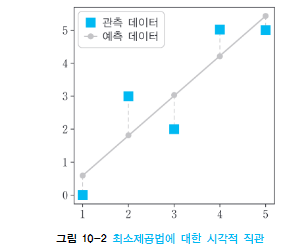

### 10.3 GLM의 간단한 예

교재로 내용 다시 살펴보기

### 10.4 QR 분해를 통한 최소제곱법

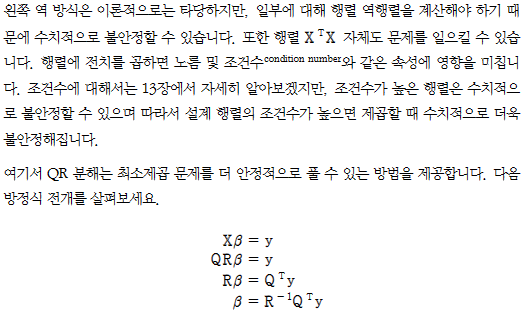

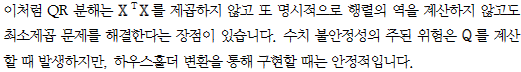

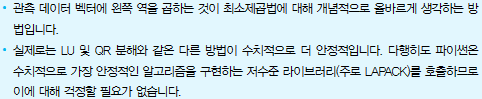

# 연습문제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# null space
from scipy.linalg import null_space

import sympy as sym


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

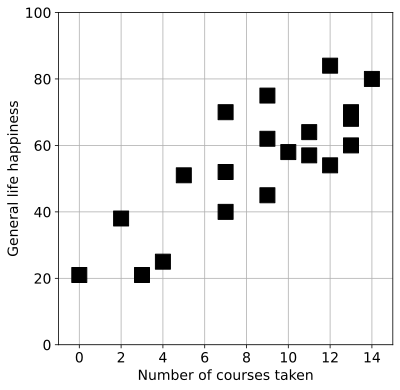

(20, 1)


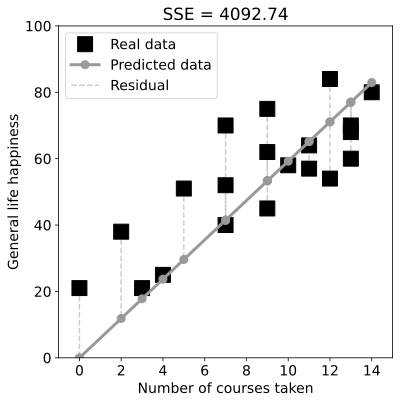

(20, 2)


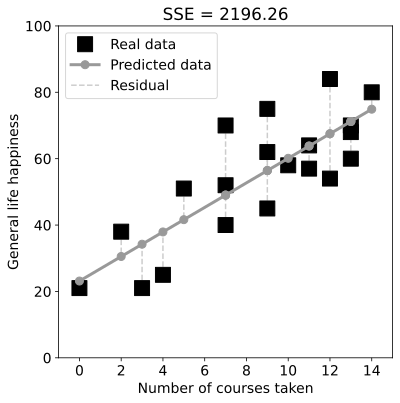

In [ ]:

numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

plt.figure(figsize=(6,6))

plt.plot(numcourses,happiness,'ks',markersize=15)
plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.xlim([-1,15])
plt.ylim([0,100])
plt.grid()
plt.xticks(range(0,15,2))
plt.savefig('Figure_10_03.png',dpi=300)
plt.show()


# Build a statistical model

# design matrix as a column vector
X = np.array(numcourses,ndmin=2).T
print(X.shape)

# fit the model using the left-inverse
X_leftinv = np.linalg.inv(X.T@X) @ X.T

# solve for the coefficients
beta = X_leftinv @ happiness
beta


# let's plot it!

# predicted data
pred_happiness = X@beta


plt.figure(figsize=(6,6))

# plot the data and predicted values
plt.plot(numcourses,happiness,'ks',markersize=15)
plt.plot(numcourses,pred_happiness,'o-',color=[.6,.6,.6],linewidth=3,markersize=8)

# plot the residuals (errors)
for n,y,yHat in zip(numcourses,happiness,pred_happiness):
  plt.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.xlim([-1,15])
plt.ylim([0,100])
plt.xticks(range(0,15,2))
plt.legend(['Real data','Predicted data','Residual'])
plt.title(f'SSE = {np.sum((pred_happiness-happiness)**2):.2f}')
plt.savefig('Figure_10_04.png',dpi=300)
plt.show()


# Build a statistical model with an intercept

# design matrix as a column vector
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
print(X.shape)

# fit the model using the left-inverse
X_leftinv = np.linalg.inv(X.T@X) @ X.T

# solve for the coefficients
beta = X_leftinv @ happiness
beta

# let's plot it!

# predicted data
pred_happiness = X@beta


plt.figure(figsize=(6,6))

# plot the data and predicted values
plt.plot(numcourses,happiness,'ks',markersize=15)
plt.plot(numcourses,pred_happiness,'o-',color=[.6,.6,.6],linewidth=3,markersize=8)

# plot the residuals (errors)
for n,y,yHat in zip(numcourses,happiness,pred_happiness):
  plt.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)

plt.xlabel('Number of courses taken')
plt.ylabel('General life happiness')
plt.xlim([-1,15])
plt.ylim([0,100])
plt.xticks(range(0,15,2))
plt.legend(['Real data','Predicted data','Residual'])
plt.title(f'SSE = {np.sum((pred_happiness-happiness)**2):.2f}')
plt.savefig('Figure_10_05.png',dpi=300)
plt.show()

# 연습문제 10-1

Dot product: -5.752553988713771e-11
Correlation: -1.9724313754422123e-16
 


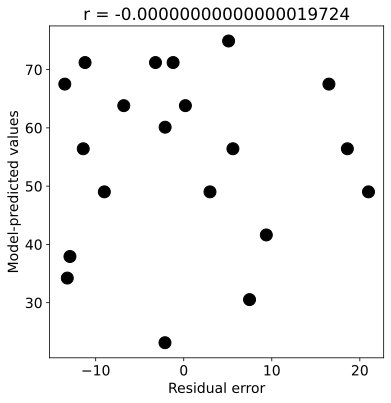

In [ ]:

# compute residual
res = happiness-pred_happiness


# should be zero + some error
print('Dot product: ' + str(np.dot(pred_happiness,res)) )
print('Correlation: ' + str(np.corrcoef(pred_happiness,res)[0,1]))
print(' ')


# show in a plot
plt.figure(figsize=(6,6))
plt.plot(res,pred_happiness,'ko',markersize=12)
plt.xlabel('Residual error')
plt.ylabel('Model-predicted values')
plt.title(f'r = {np.corrcoef(pred_happiness,res)[0,1]:.20f}')
plt.savefig('Figure_10_06.png',dpi=300)
plt.show()

In [ ]:

# correlation is smaller because we're dividing by the vector norms, e.g.,
np.linalg.norm(res)

46.86431997187644

상관계수(correlation) 계산 과정에서 벡터의 크기(노름, norms)로 나누기 때문에 상관계수의 값이 작아짐

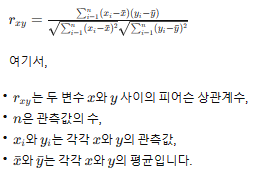

상관계수(correlation coefficient)는 두 변수 간의 선형 관계의 강도와 방향을 측정하는 통계적 지표

# 연습문제 10-2

In [ ]:

# the residual is orthogonal to the entire column space of the design matrix.

# I demonstrated this by showing that the residuals vector is in the left-null space of the design matrix.
# I did that by using scipy.linalg.null_space to find the left-null space, augmenting that null-space basis
# matrix by the residuals vector, and showing that the null space and augmented null space have the same rank.


# compute the null space (via scipy.linalg)
nullspace = null_space(X.T)


# augment the residuals
nullspaceAugment = np.hstack( (nullspace,res.reshape(-1,1)) )


# print their ranks
print(f'dim(  N(X)    ) = {np.linalg.matrix_rank(nullspace)}')
print(f'dim( [N(X)|r] ) = {np.linalg.matrix_rank(nullspaceAugment)}')

dim(  N(X)    ) = 18
dim( [N(X)|r] ) = 18


In [ ]:
res

array([ -1.20701699, -12.92316241, -13.50881092, -13.22495634,
         5.09477695,  -3.20701699,  16.49118908,   5.58580727,
        -6.81060486,  -9.0177806 , -11.20701699,   0.18939514,
       -11.41419273,   7.47324972,   9.37863153,   2.9822194 ,
        -2.11239879,  -2.13033815,  18.58580727,  20.9822194 ])

In [ ]:
nullspace

array([[-0.27772943, -0.09299579, -0.31878135, -0.29825539, -0.27772943,
        -0.21615155, -0.25720347, -0.17509963, -0.29825539, -0.25720347,
        -0.21615155, -0.07246983, -0.13404771, -0.17509963, -0.23667751,
        -0.0314179 , -0.21615155, -0.17509963],
       [ 0.09782465, -0.37554919,  0.20301883,  0.15042174,  0.09782465,
        -0.05996663,  0.04522755, -0.16516082,  0.15042174,  0.04522755,
        -0.05996663, -0.42814628, -0.270355  , -0.16516082, -0.00736954,
        -0.53334047, -0.05996663, -0.16516082],
       [ 0.93229429,  0.02391565, -0.08806601, -0.07788586, -0.06770571,
        -0.03716526, -0.05752556, -0.01680496, -0.07788586, -0.05752556,
        -0.03716526,  0.0340958 ,  0.00355534, -0.01680496, -0.04734541,
         0.0544561 , -0.03716526, -0.01680496],
       [-0.00984332,  0.88427968,  0.0136849 ,  0.00192079, -0.00984332,
        -0.04513565, -0.02160743, -0.06866387,  0.00192079, -0.02160743,
        -0.04513565, -0.12748443, -0.0921921 , -0.068

# 연습문제 10-3

In [ ]:

### Uncomment these lines to use random data
# random design matrix and data vector
# M,N = 20,3
# X = np.random.randn(M,N)
# happiness = np.random.randn(M,1)


# recreate the design matrix and solution via left-inverse
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
beta1 = np.linalg.inv(X.T@X) @ X.T @ happiness


# QR decomp
Q,R = np.linalg.qr(X)

# beta coefficients implemented as translation of the math
beta2 = np.linalg.inv(R) @ (Q.T@happiness)

# and using back-substitution via RREF
# Q'y, but needs to be reshaped into a column vector
tmp = (Q.T@happiness).reshape(-1,1)
Raug = np.hstack( (R,tmp) ) # augment the matrix
Raug_r = sym.Matrix(Raug).rref()[0] # this gets the matrix
beta3 = np.array(Raug_r[:,-1]) # convert back to numpy


print('Betas from left-inverse: ')
print(np.round(beta1,3)), print(' ')

print('Betas from QR with inv(R): ')
print(np.round(beta2,3)), print(' ')

print('Betas from QR with back-substitution: ')
print(np.round(np.array(beta3.T).astype(float),3)) # transposed to facilitate visual inspection

Betas from left-inverse: 
[23.13   3.698]
 
Betas from QR with inv(R): 
[23.13   3.698]
 
Betas from QR with back-substitution: 
[[23.13   3.698]]


In [ ]:

# show the matrices
print('Matrix R:')
print(np.round(R,3)) # note that it's upper-triangular (as you know!)

print(' ')
print("Matrix R|Q'y:")
print(np.round(Raug,3))

print(' ')
print("Matrix RREF(R|Q'y):")
print(np.round(np.array(Raug_r).astype(float),3)) # convert to numpy floats

Matrix R:
[[ -4.472 -38.237]
 [  0.     17.747]]
 
Matrix R|Q'y:
[[  -4.472  -38.237 -244.849]
 [   0.      17.747   65.631]]
 
Matrix RREF(R|Q'y):
[[ 1.     0.    23.13 ]
 [ 0.     1.     3.698]]


# 연습문제 10-4

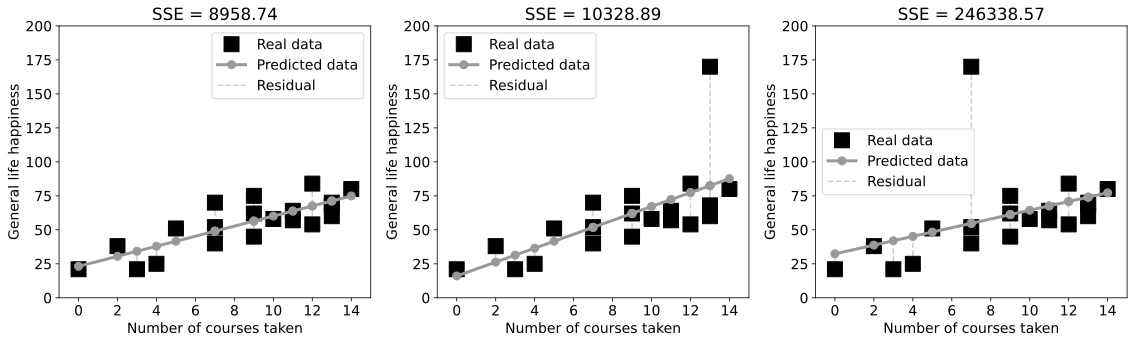

In [ ]:

# happiness with outliers due to typos (oops!)
happiness_oops1 = [170,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]
happiness_oops2 = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,170]


# design matrix and its left-inverse (doesn't change with the data)
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
X_leftinv = np.linalg.inv(X.T@X) @ X.T



_,axs = plt.subplots(1,3,figsize=(16,5))

for axi,y in zip(axs,[happiness,happiness_oops1,happiness_oops2]):

  # compute the best-fit parameters
  beta = X_leftinv @ y

  # predicted data
  pred_happiness = X@beta


  # plot the data and predicted values
  axi.plot(numcourses,y,'ks',markersize=15)
  axi.plot(numcourses,pred_happiness,'o-',color=[.6,.6,.6],linewidth=3,markersize=8)

  # plot the residuals (errors)
  for n,y,yHat in zip(numcourses,y,pred_happiness):
    axi.plot([n,n],[y,yHat],'--',color=[.8,.8,.8],zorder=-10)

  # make the plot look nicer
  axi.set(xlabel='Number of courses taken',ylabel='General life happiness',
          xlim=[-1,15],ylim=[0,200],xticks=range(0,15,2))
  axi.legend(['Real data','Predicted data','Residual'])
  axi.set_title(f'SSE = {np.sum((pred_happiness-y)**2):.2f}')



plt.tight_layout()
plt.savefig('Figure_10_07.png',dpi=300)
plt.show()

In [ ]:
numcourses

[13, 4, 12, 3, 14, 13, 12, 9, 11, 7, 13, 11, 9, 2, 5, 7, 10, 0, 9, 7]

# 연습문제 10-5

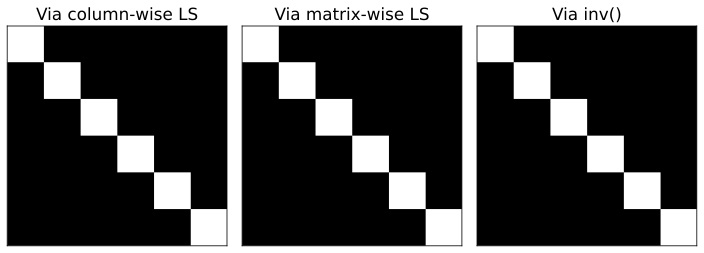

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
 
[[ 1.66533454e-16 -1.11022302e-16  4.44089210e-16  1.24900090e-16
  -1.11022302e-16 -6.10622664e-16]
 [ 2.77555756e-16  3.88578059e-16  1.16573418e-15  1.66533454e-16
  -2.49800181e-16  0.00000000e+00]
 [ 1.11022302e-15  8.30607284e-16  1.33226763e-15  3.33066907e-16
  -4.44089210e-16  0.00000000e+00]
 [ 1.55431223e-15  1.02695630e-15  2.49800181e-15  3.88578059e-16
  -7.77156117e-16 -4.44089210e-16]
 [ 5.55111512e-17 -2.77555756e-17 -8.32667268e-17  0.00000000e+00
   0.00000000e+00 -8.32667268e-17]
 [ 2.22044605e-15  1.55431223e-15  4.88498131e-15  5.82867088e-16
  -9.43689571e-16 -9.99200722e-16]]
 
[[ 1.66533454e-16 -1.11022302e-16  4.44089210e-16  1.24900090e-16
  -1.11022302e-16 -6.10622664e-16]
 [ 2.77555756e-16  3.88578059e-16  1.16573418e-15  1.66533454e-16
  -2.49800181e-16  0.00000000e+00]
 [ 1.11022302e-15  8.30607284e-16  1.33226763e-15  3.3306690

In [ ]:
# matrix size
n = 6

# some random "design matrix"
X = np.random.randn(n,n)

# the target matrix (identity)
Y = np.eye(n)


# find the best-fitting model one column at a time
Xinv1 = np.zeros_like(X)

for coli in range(n):
  Xinv1[:,coli] = np.linalg.inv(X.T@X) @ X.T @ Y[:,coli]



# repeat but without a loop
Xinv2 = np.linalg.inv(X.T@X) @ X.T @ Y


# and the inverse using inv()
Xinv3 = np.linalg.inv(X)


# visualize
_,axs = plt.subplots(1,3,figsize=(10,6))

# column-wise least-squares
axs[0].imshow( Xinv1@X ,cmap='gray')
axs[0].set_title('Via column-wise LS')

# matrix-wise least-squares
axs[1].imshow( Xinv2@X ,cmap='gray' )
axs[1].set_title('Via matrix-wise LS')

# inv()
axs[2].imshow( Xinv3@X ,cmap='gray' )
axs[2].set_title('Via inv()')


# don't need the tick marks
for a in axs: a.set(xticks=[],yticks=[])

plt.tight_layout()
plt.savefig('Figure_10_08.png',dpi=300)
plt.show()


# show they are equivalent
# Note the relatively large rounding errors when comparing to inv() -- the left-inverse
#   least-squares method is not a numerically stable method!


print(Xinv1-Xinv2)
print(' ')

print(Xinv1-Xinv3)
print(' ')

print(Xinv2-Xinv3)
